In [134]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [135]:
td_filepath = r"C:\Users\npilyugina\Desktop\Repo\ml-intro\2_data_exploration\train.csv"
td = pd.read_csv(td_filepath, index_col="PassengerId")
td

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


# Context

# Data quality assessment

Checking for NA values across the dataset

<AxesSubplot:xlabel='PassengerId'>

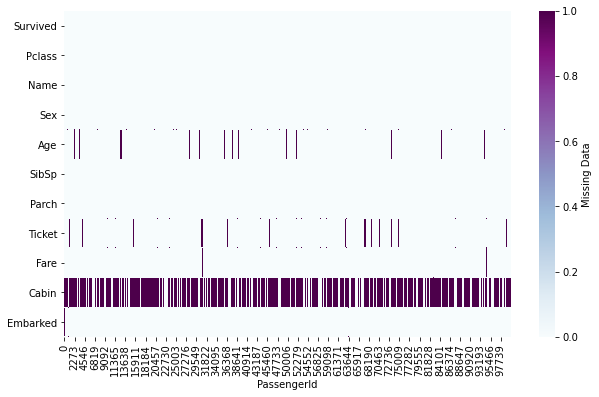

In [136]:
plt.figure(figsize=(10,6))
sns.heatmap(td.isna().transpose(),
            cmap="BuPu",
            cbar_kws={'label': 'Missing Data'})

<Figure size 720x432 with 0 Axes>

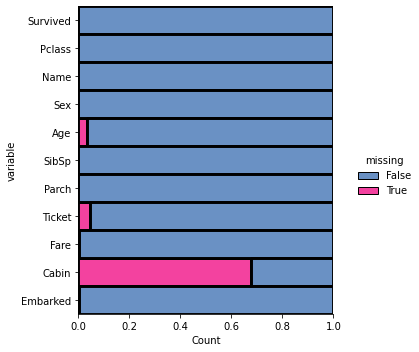

In [137]:
plt.figure(figsize=(10,6))
sns.displot(
    data=td.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    palette = sns.color_palette('Accent')[4:6],
    multiple="fill"
)

Values distribution and NA values fix

Text(0.5, 1.0, 'Sex distribution')

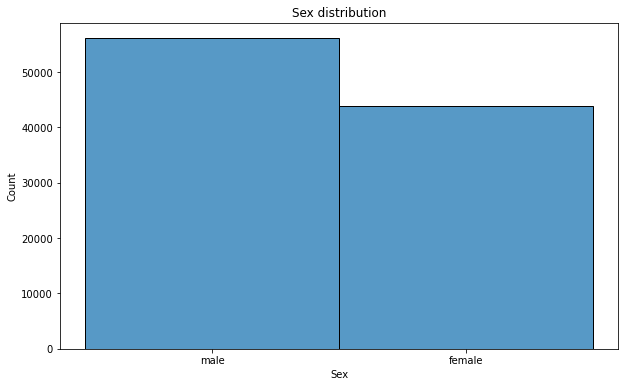

In [138]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Sex')
plt.title("Sex distribution")

Text(0.5, 1.0, 'Class distribution')

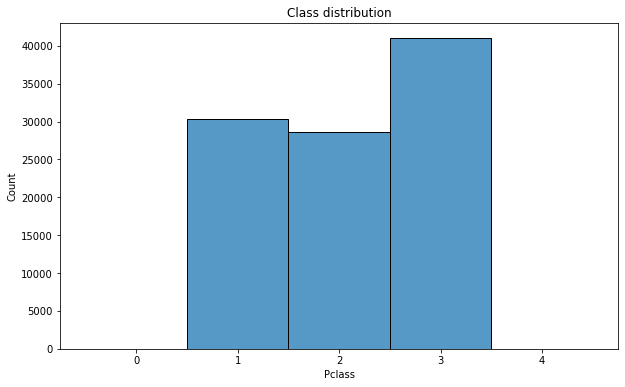

In [139]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Pclass', bins=np.arange(6)-0.5)
plt.title("Class distribution")

Text(0.5, 1.0, 'Survival distribution')

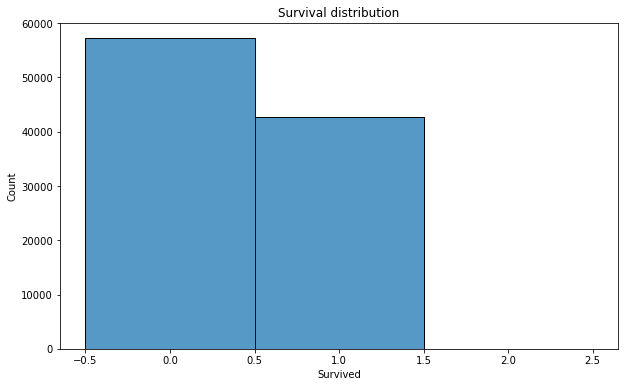

In [140]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Survived', bins=np.arange(4)-0.5)
plt.title("Survival distribution")

Text(0.5, 1.0, 'Port of Embarkation distribution')

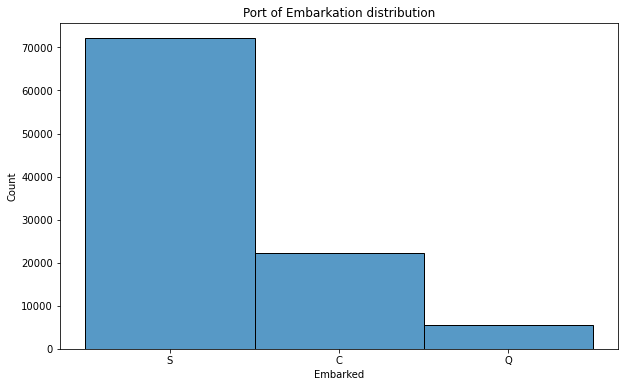

In [141]:
plt.figure(figsize=(10,6))
tdemb = td[td['Embarked'].notnull()]
sns.histplot(data=tdemb, x='Embarked')
plt.title("Port of Embarkation distribution")

Fill NA for Embarked with the most common value - S

In [142]:
td['Embarked'] = td['Embarked'].fillna('S')

Fill NA for Age with the mean value

In [143]:
a = td['Age'].mean()
td['Age'] = td['Age'].fillna(a)

Text(0.5, 1.0, 'Age distribution')

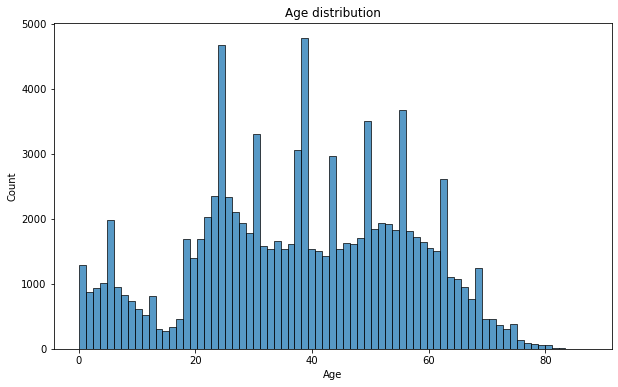

In [144]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Age')
plt.title("Age distribution")

Fill NA for Fare with the mean value

In [145]:
a = td['Fare'].mean()
td['Fare'] = td['Fare'].fillna(a)

Text(0.5, 1.0, 'Fare distribution')

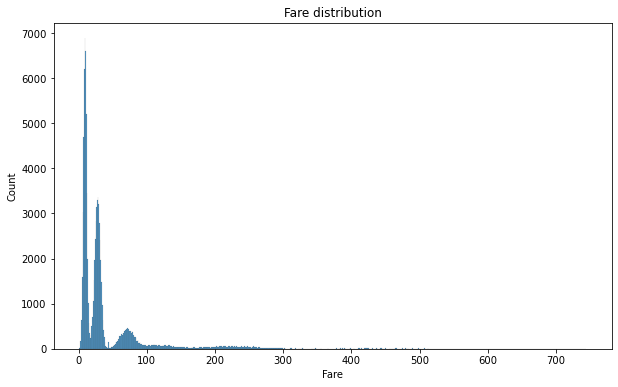

In [146]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Fare')
plt.title("Fare distribution")

Get the Cabin level for non NA values

In [154]:
tdcab = td[td['Cabin'].notnull()]
tdcablvl = tdcab['Cabin'].astype(str).str[0]
tdcab.insert(len(tdcab.columns), 'cablvl', tdcablvl.values)

In [148]:
# tdcab['cablvl'] = pd.Categorical(td['cablvl'], ['A','B','C','D','E','F','G','T'])

Text(0.5, 1.0, 'Cabin level distribution')

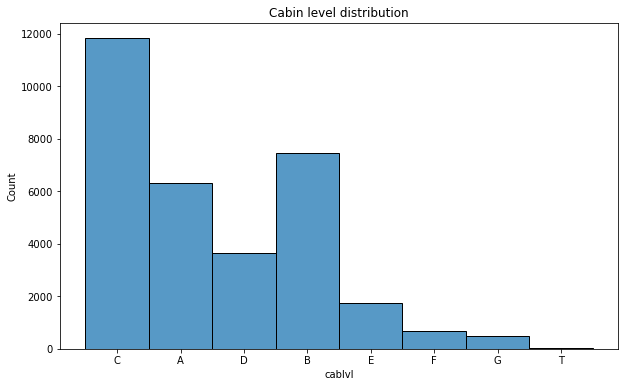

In [155]:
plt.figure(figsize=(10,6))
sns.histplot(data=tdcab, x='cablvl')
plt.title("Cabin level distribution")

# Data exploration

<AxesSubplot:xlabel='Sex', ylabel='Count'>

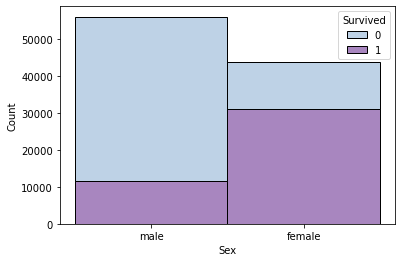

In [160]:
sns.histplot(data=td, stat="count", multiple="stack",
             x="Sex", kde=False,
             palette="BuPu", hue="Survived",
             element="bars", legend=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

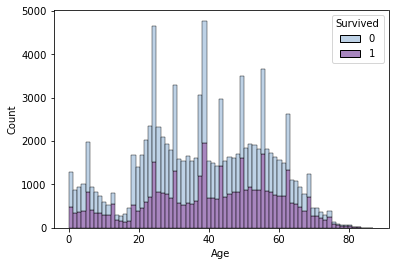

In [161]:
sns.histplot(data=td, stat="count", multiple="stack",
             x="Age", kde=False,
             palette="BuPu", hue="Survived",
             element="bars", legend=True)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

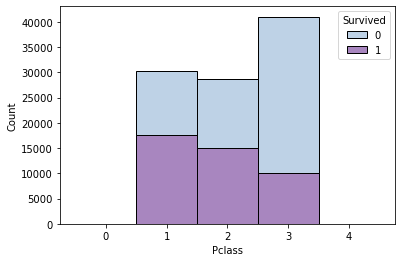

In [163]:
sns.histplot(data=td, stat="count", multiple="stack",
             x="Pclass", kde=False,
             palette="BuPu", hue="Survived",
             element="bars", legend=True, bins=np.arange(6)-0.5)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

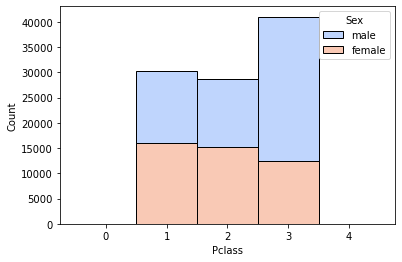

In [165]:
sns.histplot(data=td, stat="count", multiple="stack",
             x="Pclass", kde=False,
             palette="coolwarm", hue="Sex",
             element="bars", legend=True, bins=np.arange(6)-0.5)

# Summary

Age does not affect the survival rate, even though the crew was ordered to evacuate women and _children_ first. 
Women have higher survival rate, makes sense according to the given orders.
First class pasengers have higher survival rate, but distribution of 
Overall we have an unexpectedly high survival rate(?)